In [6]:
from ising_model import OlfactionIsingModel
import jax
import jax.numpy as jnp
import jax.random as jrandom
from jax import grad, value_and_grad, jit, vmap, lax, jit, tree_util, nn
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
from matplotlib.gridspec import GridSpec
import pandas as pd
from scipy.ndimage import maximum_filter
import matplotlib.colors as mcolors
import numpy as np

In [48]:
DATA_PATH = '../vcf/Matrix2.csv'
key = jax.random.PRNGKey(0)
ofm = OlfactionIsingModel(DATA_PATH, key, fraction=.3)
shuffled_ofm = OlfactionIsingModel(DATA_PATH, key, fraction=.3, shuffle=True)

In [52]:
m, c = ofm.set_empirical_means(False)
sm, sc = shuffled_ofm.set_empirical_means(False) 

In [53]:
def mask_and_flatten(array): 
    return (array * (1 - jnp.eye(len(array)))).flatten()

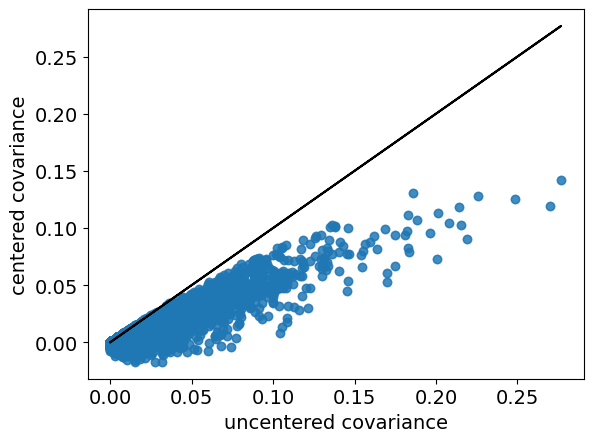

In [58]:
fig, ax = plt.subplots()
ax.scatter(mask_and_flatten(c), mask_and_flatten(c - jnp.einsum('i,j->ij', m, m)), alpha=0.6)
ax.plot(mask_and_flatten(c), mask_and_flatten(c), color='black')
ax.set_xlabel('uncentered covariance') 
ax.set_ylabel('centered covariance') 
plt.savefig('tmp.png', bbox_inches='tight')

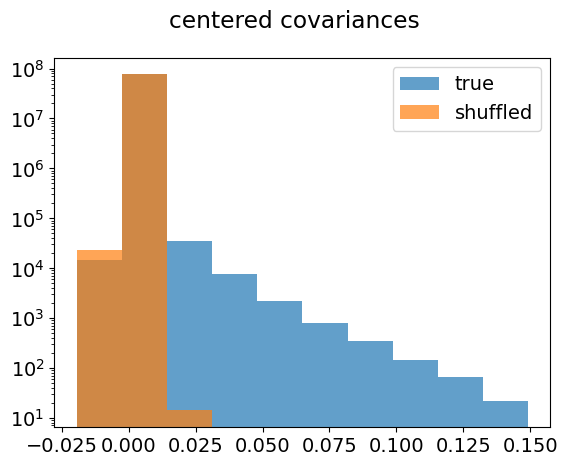

In [47]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(mask_and_flatten(c), alpha=0.7, label='true')
ax.hist(mask_and_flatten(sc), alpha=0.7, bins=bins, label='shuffled')
ax.set_yscale('log') 
ax.legend()
fig.suptitle('centered covariances')
fig.savefig('tmp.png', bbox_inches='tight')

[]

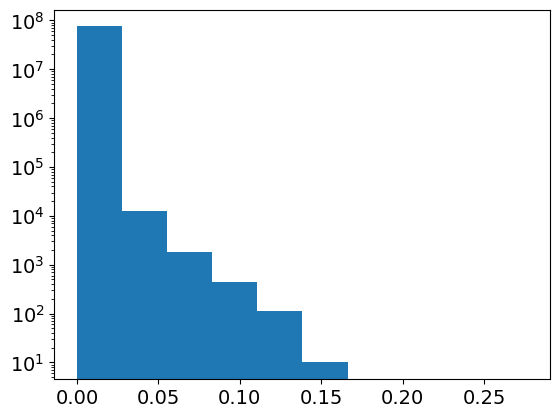

In [43]:
plt.hist(mask_and_flatten(c) - mask_and_flatten(sc), bins=bins) 
plt.semilogy()